In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import glob
from joblib import Parallel, delayed
import seaborn as sns

In [2]:
from sktime.transformations.panel.rocket import MiniRocket
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay, accuracy_score
from sklearn.model_selection import LeaveOneOut, train_test_split

In [15]:
# Load 15 patients EEG files
file_paths = glob.glob('eeg_label/*_eeg_label.csv')

data_list = []
labels_list = []
patient_ids = []

for file_path in file_paths:
    eeg_data = pd.read_csv(file_path)
    patient_id = file_path.split('/')[-1]
    
    # Segment the data into non-overlapping 30-second windows
    segment_size = 128 * 10
    num_segments = len(eeg_data) // segment_size
    
    for i in range(num_segments):
        start_idx = i * segment_size
        end_idx = start_idx + segment_size
        segment = eeg_data['EEG'].iloc[start_idx:end_idx].values
        label = eeg_data['Label'].iloc[start_idx:end_idx].mode()[0]
        
        data_list.append(segment)
        labels_list.append(label)
        patient_ids.append(patient_id)  # Repeat patient ID for each segment

# Convert lists to numpy arrays
X = np.array(data_list)
y = np.array(labels_list)
patient_ids = np.array(patient_ids)

In [16]:
# Load BIS files
bis_files = glob.glob('bis_label/*_label.csv')

# Initialize a list to store DataFrames
bis_dataframes = []

# Loop over the file paths and load each one into a DataFrame
for file in bis_files:
    df = pd.read_csv(file)
    bis_dataframes.append(df)

# Optionally, you can concatenate all DataFrames into one
all_bis_data = pd.concat(bis_dataframes, ignore_index=True)

In [17]:
X_reshaped = X.reshape(X.shape[0], 1, X.shape[1])

In [18]:
X_reshaped.shape

(5034, 1, 1280)

In [19]:
# Initialize the MiniRocket transformer
minirocket = MiniRocket(random_state=123)

# Transform the entire dataset using MiniRocket
X_transformed = minirocket.fit_transform(X_reshaped)

In [20]:
X_transformed.shape

(5034, 9996)

In [21]:
# Scale the transformed data
scaler = StandardScaler(with_mean=False)
X_scaled = scaler.fit_transform(X_transformed)

In [22]:
X_scaled.shape

(5034, 9996)

In [23]:
# Split the data into training and testing sets (you can adjust the size)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Train Logistic Regression on the transformed features
classifier = LogisticRegression(random_state=0, solver='liblinear', max_iter=1000)
classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = classifier.predict(X_test)

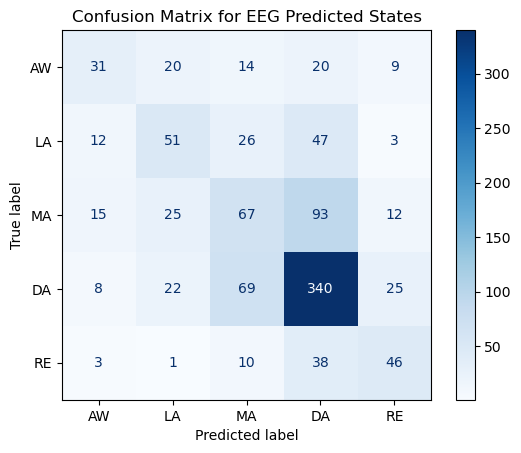

In [24]:
cm = confusion_matrix(y_test, y_pred, labels=['AW', 'LA', 'MA', 'DA', 'RE'])

# Plot the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['AW', 'LA', 'MA', 'DA', 'RE'])
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix for EEG Predicted States')
plt.show()

In [25]:
report = classification_report(y_test, y_pred, labels=['AW', 'LA', 'MA', 'DA', 'RE'], target_names=['AW', 'LA', 'MA', 'DA', 'RE'])

# Print the classification report
print(report)

# Optionally, calculate and print overall accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Overall Accuracy: {accuracy:.2f}')

              precision    recall  f1-score   support

          AW       0.45      0.33      0.38        94
          LA       0.43      0.37      0.40       139
          MA       0.36      0.32      0.34       212
          DA       0.63      0.73      0.68       464
          RE       0.48      0.47      0.48        98

    accuracy                           0.53      1007
   macro avg       0.47      0.44      0.45      1007
weighted avg       0.52      0.53      0.52      1007

Overall Accuracy: 0.53


In [26]:
# Load 15 patients EEG files
file_paths = glob.glob('eeg_label/*_eeg_label.csv')

data_list = []
labels_list = []
patient_ids = []

for file_path in file_paths:
    eeg_data = pd.read_csv(file_path)
    patient_id = file_path.split('/')[-1]
    
    # Segment the data into non-overlapping 30-second windows
    segment_size = 128 * 30
    num_segments = len(eeg_data) // segment_size
    
    for i in range(num_segments):
        start_idx = i * segment_size
        end_idx = start_idx + segment_size
        segment = eeg_data['EEG'].iloc[start_idx:end_idx].values
        label = eeg_data['Label'].iloc[start_idx:end_idx].mode()[0]
        
        data_list.append(segment)
        labels_list.append(label)
        patient_ids.append(patient_id)  # Repeat patient ID for each segment

# Convert lists to numpy arrays
X = np.array(data_list)
y = np.array(labels_list)
patient_ids = np.array(patient_ids)

In [27]:
X_reshaped = X.reshape(X.shape[0], 1, X.shape[1])

# Initialize the MiniRocket transformer
minirocket = MiniRocket(random_state=123)

# Transform the entire dataset using MiniRocket
X_transformed = minirocket.fit_transform(X_reshaped)

scaler = StandardScaler(with_mean=False)
X_scaled = scaler.fit_transform(X_transformed)

# Split the data into training and testing sets (you can adjust the size)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Train Logistic Regression on the transformed features
classifier = LogisticRegression(random_state=0, solver='liblinear', max_iter=1000)
classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = classifier.predict(X_test)

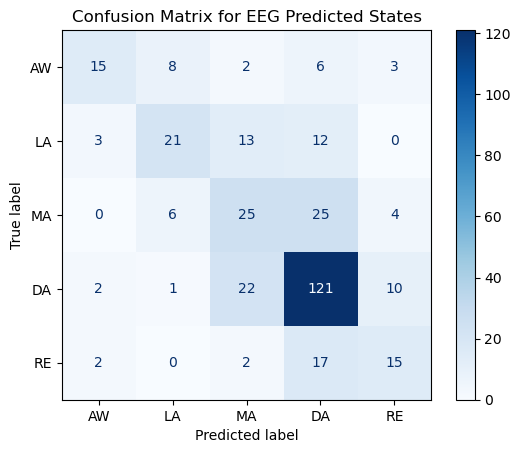

              precision    recall  f1-score   support

          AW       0.68      0.44      0.54        34
          LA       0.58      0.43      0.49        49
          MA       0.39      0.42      0.40        60
          DA       0.67      0.78      0.72       156
          RE       0.47      0.42      0.44        36

    accuracy                           0.59       335
   macro avg       0.56      0.50      0.52       335
weighted avg       0.59      0.59      0.58       335

Overall Accuracy: 0.59


In [28]:
cm = confusion_matrix(y_test, y_pred, labels=['AW', 'LA', 'MA', 'DA', 'RE'])

# Plot the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['AW', 'LA', 'MA', 'DA', 'RE'])
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix for EEG Predicted States')
plt.show()

report = classification_report(y_test, y_pred, labels=['AW', 'LA', 'MA', 'DA', 'RE'], target_names=['AW', 'LA', 'MA', 'DA', 'RE'])

# Print the classification report
print(report)

# Optionally, calculate and print overall accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Overall Accuracy: {accuracy:.2f}')